# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [137]:
import pandas as pd

sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [138]:
print("Vendite maggiori di 10")
sales.loc[sales["sales"] >10, "sales"]

Vendite maggiori di 10


0    14
1    17
3    12
7    15
Name: sales, dtype: int64

In [139]:
print("Dati del 2018")
sales.loc[sales["year"]==2018]

Dati del 2018


,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018


In [140]:
print("\nVendite maggiori di 13 e l'anno è il 2018")
s = sales.loc[(sales["sales"] >13)&(sales["year"] ==2018)]
s["sales"][0].item()


Vendite maggiori di 13 e l'anno è il 2018


14

In [141]:
print("\nDati TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018")
sales.loc[(sales["sales"]<=13)&(sales["year"] !=2018)]


Dati TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018


,employee,sales,year
2,Jan,6,2020
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
8,Egweyn,5,2020


In [142]:
print("\nDati dove le vendite divise per 3 sono maggiori di 3")
sales.loc[sales["sales"]/3 >3]


Dati dove le vendite divise per 3 sono maggiori di 3


,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [144]:
print("Dipendenti i cui nomi sono alfabeticamente dopo la J")
sales[sales["employee"].str[0] > "J"]

Dipendenti i cui nomi sono alfabeticamente dopo la J


,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018
5,Paola,3,2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 

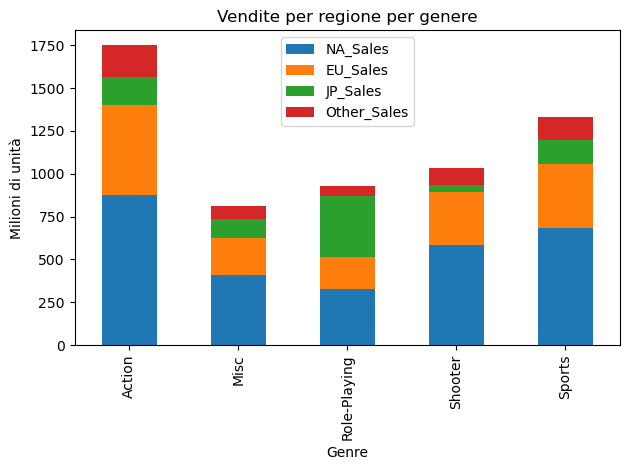


In [146]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [147]:
print(f"Sono stati pubblicati {df.shape[0]} videogiochi")

Sono stati pubblicati 16598 videogiochi


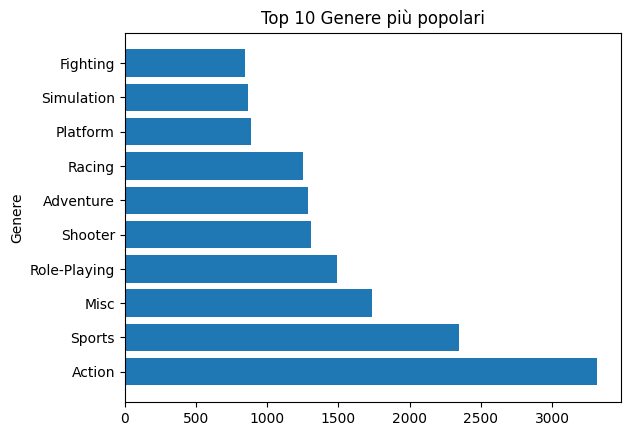

In [148]:
genere_count = df["Genre"].value_counts().reset_index().head(10)

plt.barh(genere_count["Genre"], genere_count["count"])
plt.title("Top 10 Genere più popolari")
plt.ylabel("Genere")
plt.show()

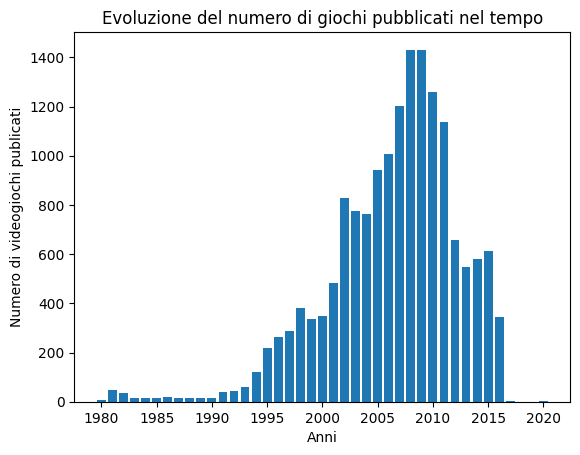

In [149]:
giochi_anni = df["Year"].value_counts().reset_index()

plt.bar(giochi_anni["Year"], giochi_anni["count"])
plt.title("Evoluzione del numero di giochi pubblicati nel tempo")
plt.xlabel("Anni")
plt.ylabel("Numero di videogiochi publicati")
plt.show()

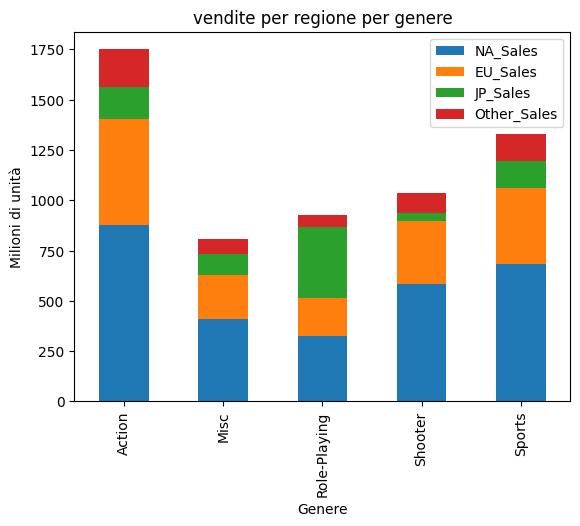

In [150]:
vend_per_reg = df.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()
grah = vend_per_reg.loc[["Action","Misc","Role-Playing","Shooter","Sports"]]

grah.plot(kind="bar", stacked=True)
plt.title("vendite per regione per genere")
plt.xlabel("Genere")
plt.ylabel("Milioni di unità")
plt.show()